# Estudo de casos exponenciais

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

def ajuste_exponencial(dados, taxas, lambda_ridge=None):
    tempo = dados["t"].values
    sinal = dados["y"].values
    # matriz Phi
    Phi = np.exp(-np.outer(tempo, taxas))
    # G e b
    G = Phi.T @ Phi
    b = Phi.T @ sinal
    # resolver OLS ou Ridge
    if lambda_ridge is None:
        pesos = np.linalg.solve(G, b)
    else:
        pesos = np.linalg.solve(G + lambda_ridge*np.eye(len(taxas)), b)
    # previsões e resíduos
    previsao = Phi @ pesos
    residuos = sinal - previsao
    rmse = np.sqrt(np.mean(residuos**2))
    return pesos, previsao, residuos, rmse


In [3]:

arquivo_2 = "Alan Diek da Silva Guimaraes - expmix_2terms_noisy.csv"
arquivo_10 = "Alan Diek da Silva Guimaraes - expmix_10terms_noisy.csv"
arquivo_8 = "Alan Diek da Silva Guimaraes - expdecay_8terms_noisy.csv"

dados_2 = pd.read_csv(arquivo_2)
dados_10 = pd.read_csv(arquivo_10)
dados_8 = pd.read_csv(arquivo_8)


In [4]:

taxas_2 = [0.3, 1.1]
taxas_10 = [0.15,0.28,0.4,0.55,0.7,0.9,1.2,1.6,2.2,3.0]
taxas_8 = np.logspace(-3,1,30)


## Resolução: expmix_2terms_noisy

In [5]:

pesos2, previsao2, residuos2, rmse2 = ajuste_exponencial(dados_2, taxas_2)

print("=== Ajuste para expmix_2terms_noisy ===")
for i, p in enumerate(pesos2, start=1):
    print(f"Coeficiente w{i}: {p:.2f}")
print(f"RMSE: {rmse2:.2f}")


=== Ajuste para expmix_2terms_noisy ===
Coeficiente w1: 1.83
Coeficiente w2: 0.79
RMSE: 0.09


## Resolução: expmix_10terms_noisy

In [6]:

pesos10, previsao10, residuos10, rmse10 = ajuste_exponencial(dados_10, taxas_10)

print("=== Ajuste para expmix_10terms_noisy ===")
for i, p in enumerate(pesos10, start=1):
    print(f"Coeficiente w{i}: {p:.2f}")
print(f"RMSE: {rmse10:.2f}")


=== Ajuste para expmix_10terms_noisy ===
Coeficiente w1: 78.02
Coeficiente w2: -903.48
Coeficiente w3: 3315.65
Coeficiente w4: -7417.90
Coeficiente w5: 9004.00
Coeficiente w6: -5875.77
Coeficiente w7: 2414.19
Coeficiente w8: -736.29
Coeficiente w9: 146.99
Coeficiente w10: -19.81
RMSE: 0.05


## Resolução: expdecay_8terms_noisy

In [7]:

pesos8, previsao8, residuos8, rmse8 = ajuste_exponencial(dados_8, taxas_8)

print("=== Ajuste para expdecay_8terms_noisy ===")
for i, p in enumerate(pesos8[:10], start=1):
    print(f"Coeficiente w{i}: {p:.2f}")
print("...")
print(f"Total de coeficientes: {len(pesos8)}")
print(f"RMSE: {rmse8:.2f}")


=== Ajuste para expdecay_8terms_noisy ===
Coeficiente w1: -43608.27
Coeficiente w2: 48443.97
Coeficiente w3: -5760.02
Coeficiente w4: 14820.90
Coeficiente w5: -22159.41
Coeficiente w6: -40331.95
Coeficiente w7: -5943.36
Coeficiente w8: 47192.92
Coeficiente w9: 11261.60
Coeficiente w10: 26142.97
...
Total de coeficientes: 30
RMSE: 0.04


## Resumo dos Resultados

In [8]:

resumo = pd.DataFrame({
    "Caso": ["2 termos", "10 termos", "8 termos (30 taxas logspace)"],
    "n_taxas": [len(taxas_2), len(taxas_10), len(taxas_8)],
    "RMSE": [f"{rmse2:.2f}", f"{rmse10:.2f}", f"{rmse8:.2f}"]
})
print("Resumo comparativo dos RMSE:")
display(resumo)


Resumo comparativo dos RMSE:


,Caso,n_taxas,RMSE
0,2 termos,2,0.09
1,10 termos,10,0.05
2,8 termos (30 taxas logspace),30,0.04


## Visualização dos Dados

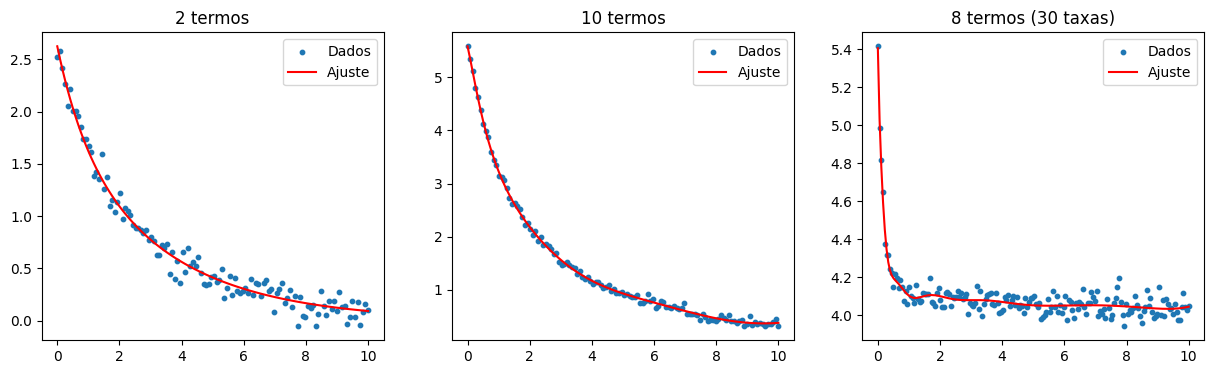

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].scatter(dados_2["t"], dados_2["y"], label="Dados", s=10)
axes[0].plot(dados_2["t"], previsao2, c="r", label="Ajuste")
axes[0].set_title("2 termos")
axes[0].legend()

axes[1].scatter(dados_10["t"], dados_10["y"], label="Dados", s=10)
axes[1].plot(dados_10["t"], previsao10, c="r", label="Ajuste")
axes[1].set_title("10 termos")
axes[1].legend()

axes[2].scatter(dados_8["t"], dados_8["y"], label="Dados", s=10)
axes[2].plot(dados_8["t"], previsao8, c="r", label="Ajuste")
axes[2].set_title("8 termos (30 taxas)")
axes[2].legend()

plt.show()
